In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement

BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location

GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#outliers detection
numeric_cols = train.select_dtypes(include=np.number).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower) | (train[col] > upper)].shape[0]
    outlier_summary[col] = outliers

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
print("\nTop Columns with Outliers:\n", outlier_df.sort_values(by="Outlier_Count", ascending=False).head())


Top Columns with Outliers:
                Outlier_Count
EnclosedPorch            208
BsmtFinSF2               167
OverallCond              125
ScreenPorch              116
MSSubClass               103


In [10]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [11]:
categorical_cols = train.select_dtypes(include='object').columns

In [12]:
train[numeric_cols] = num_imputer.fit_transform(train[numeric_cols])
train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])

In [13]:
# Encoding Categorical Variables
le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])
    

In [14]:
train["TotalSF"] = (
    train["TotalBsmtSF"] +
    train["1stFlrSF"] +
    train["2ndFlrSF"]
)

In [15]:
train["HouseAge"] = train["YrSold"] - train["YearBuilt"]
train["RemodAge"] = train["YrSold"] - train["YearRemodAdd"]

In [16]:
train["IsRemodeled"] = (
    train["YearBuilt"] != train["YearRemodAdd"]
).astype(int)

In [17]:
train["TotalBath"] = (
    train["BsmtFullBath"] +
    0.5 * train["BsmtHalfBath"] +
    train["FullBath"] +
    0.5 * train["HalfBath"]
)

In [18]:
train["HasFireplace"] = (train["Fireplaces"] > 0).astype(int)

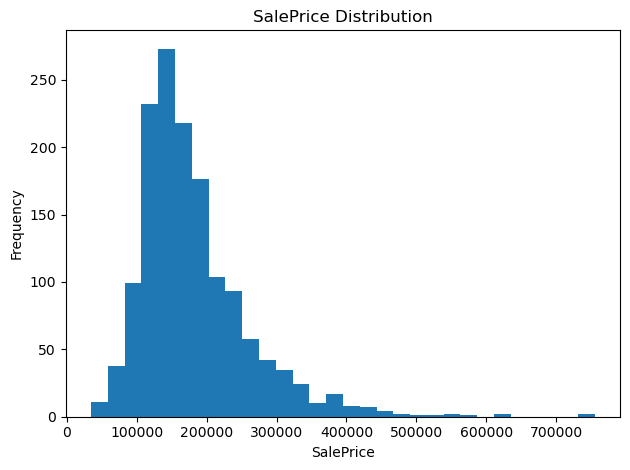

In [19]:
#target variable analysis
plt.figure()
plt.hist(train["SalePrice"], bins=30)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

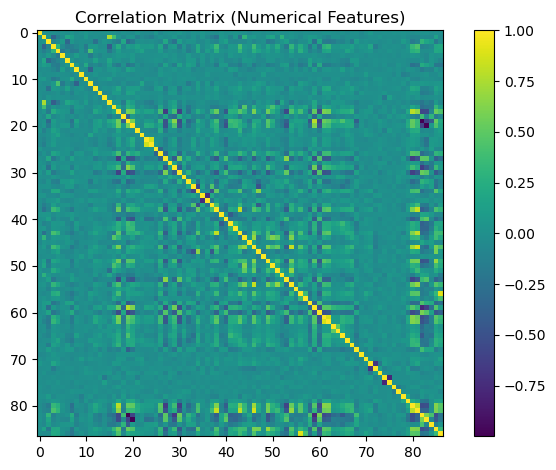

In [20]:
#corelation analysis
numeric_cols = train.select_dtypes(include=np.number)

corr_matrix = numeric_cols.corr()

plt.figure()
plt.imshow(corr_matrix)
plt.title("Correlation Matrix (Numerical Features)")
plt.colorbar()
plt.tight_layout()
plt.show()


In [21]:
sale_corr = corr_matrix["SalePrice"].sort_values(ascending=False)

print("\nTop 10 Positive Correlations with SalePrice:\n")
print(sale_corr.head(10))

print("\nTop 10 Negative Correlations with SalePrice:\n")
print(sale_corr.tail(10))


Top 10 Positive Correlations with SalePrice:

SalePrice      1.000000
OverallQual    0.790982
TotalSF        0.782260
GrLivArea      0.708624
GarageCars     0.640409
TotalBath      0.631731
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
Name: SalePrice, dtype: float64

Top 10 Negative Correlations with SalePrice:

LotShape       -0.255580
BsmtExposure   -0.295407
GarageType     -0.302105
HeatingQC      -0.400178
RemodAge       -0.509079
HouseAge       -0.523350
GarageFinish   -0.537242
KitchenQual    -0.589189
BsmtQual       -0.618025
ExterQual      -0.636884
Name: SalePrice, dtype: float64


In [22]:
categorical_cols = train.select_dtypes(include='object').columns

print("\nNumber of Categorical Features:", len(categorical_cols))

for col in categorical_cols[:5]:  # Show only first 5 to avoid too many plots
    plt.figure()
    train[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()



Number of Categorical Features: 0


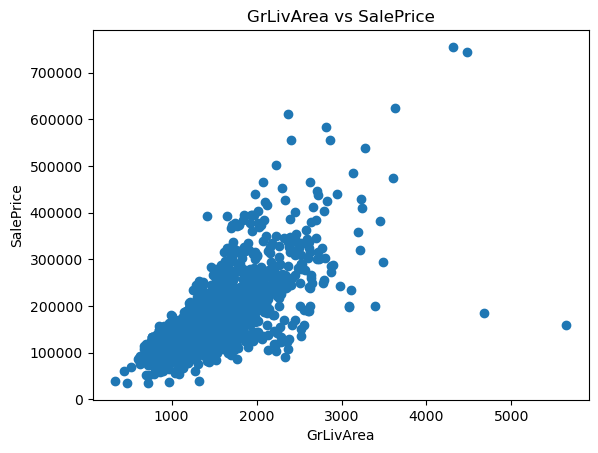

In [28]:
plt.figure()
plt.scatter(train["GrLivArea"], train["SalePrice"])
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

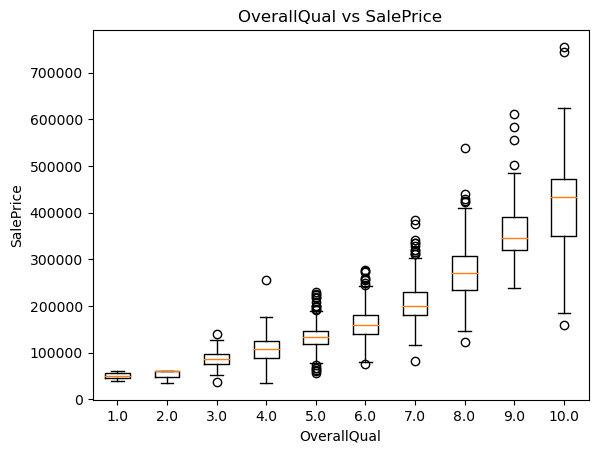

In [29]:
plt.figure()
data = []
labels = sorted(train["OverallQual"].unique())
for val in labels:
    data.append(train[train["OverallQual"] == val]["SalePrice"])
plt.boxplot(data)
plt.title("OverallQual vs SalePrice")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

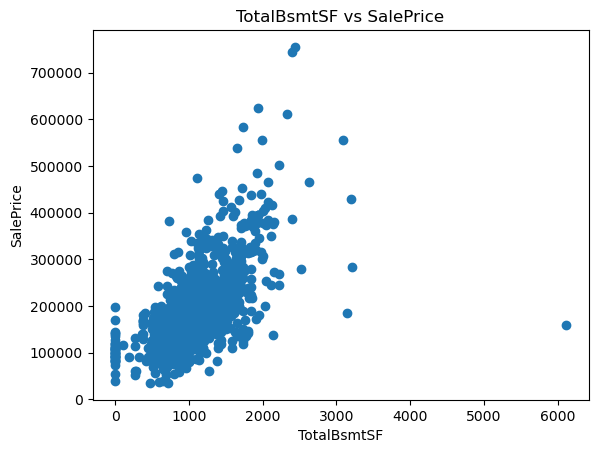

In [30]:
plt.figure()
plt.scatter(train["TotalBsmtSF"], train["SalePrice"])
plt.title("TotalBsmtSF vs SalePrice")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

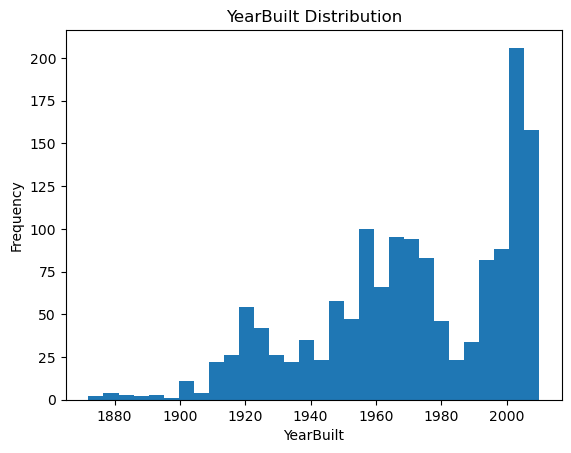

In [31]:
plt.figure()
plt.hist(train["YearBuilt"], bins=30)
plt.title("YearBuilt Distribution")
plt.xlabel("YearBuilt")
plt.ylabel("Frequency")
plt.show()

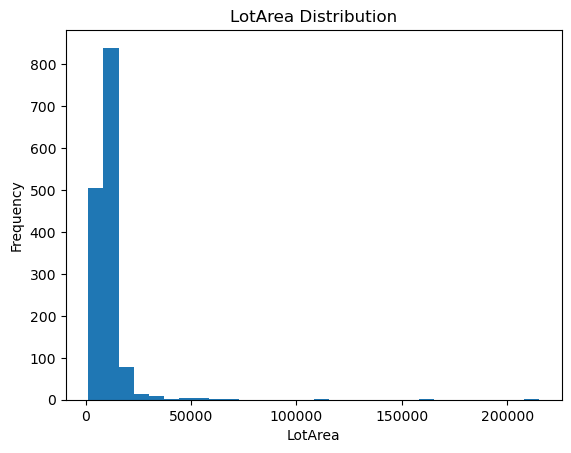

In [32]:
plt.figure()
plt.hist(train["LotArea"], bins=30)
plt.title("LotArea Distribution")
plt.xlabel("LotArea")
plt.ylabel("Frequency")
plt.show()

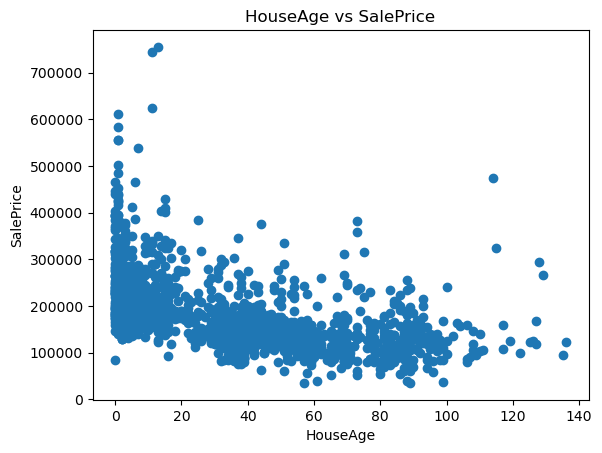

In [33]:
train["HouseAge"] = train["YrSold"] - train["YearBuilt"]

plt.figure()
plt.scatter(train["HouseAge"], train["SalePrice"])
plt.title("HouseAge vs SalePrice")
plt.xlabel("HouseAge")
plt.ylabel("SalePrice")
plt.show()
